In [15]:
import sympy
sympy.init_printing()

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [18]:
f = sympy.exp(-a*t)
f

In [19]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

In [20]:
sympy.laplace_transform(f, t, s)

⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

In [21]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [22]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [23]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [24]:
invL(F)

In [25]:
sympy.Heaviside(t)

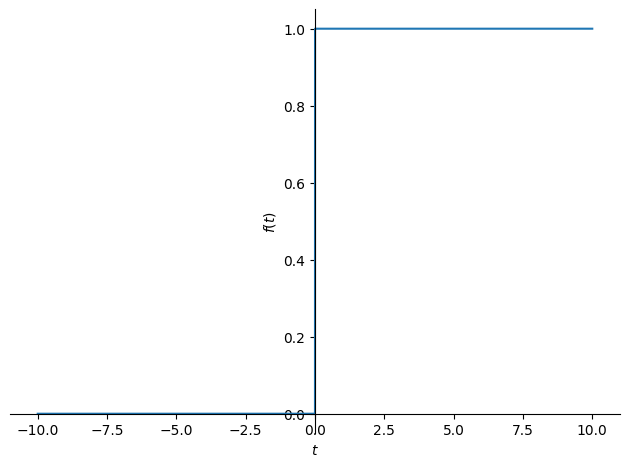

In [26]:
sympy.plot(sympy.Heaviside(t));

In [27]:
invL(F).subs({a: 2})

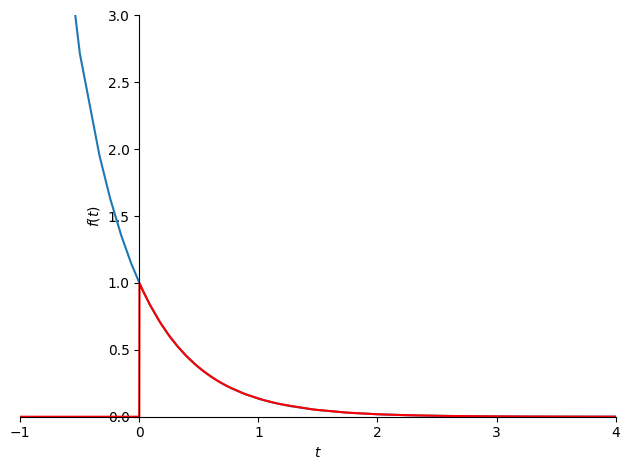

In [28]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [29]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

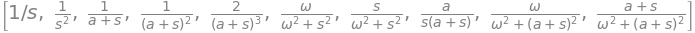

In [30]:
Fs = [L(f) for f in functions]
Fs

In [33]:
from pandas import DataFrame

In [35]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [36]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$
8,$$e^{- a t} \sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left(\omega t \right)}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...
